In [1]:
from numpy import *

In [2]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    #注意这里和python2的区别，需要在map函数外加一个list（），否则显示结果为 map at 0x3fed1d0
    return mat(datArr)

In [3]:
def pca(dataMat, topNfeat=9999999):
    """pca

    Args:
        dataMat   原数据集矩阵
        topNfeat  应用的N个特征
    Returns:
        lowDDataMat  降维后数据集
        reconMat     新的数据集空间
    """

    # 计算每一列的均值
    meanVals = mean(dataMat, axis=0)
    # print('meanVals', meanVals)

    # 每个向量同时都减去 均值
    meanRemoved = dataMat - meanVals
    # print('meanRemoved=', meanRemoved)

    # cov协方差=[(x1-x均值)*(y1-y均值)+(x2-x均值)*(y2-y均值)+...+(xn-x均值)*(yn-y均值)+]/(n-1)
    '''
    方差：（一维）度量两个随机变量关系的统计量
    协方差： （二维）度量各个维度偏离其均值的程度
    协方差矩阵：（多维）度量各个维度偏离其均值的程度

    当 cov(X, Y)>0时，表明X与Y正相关；(X越大，Y也越大；X越小Y，也越小。这种情况，我们称为“正相关”。)
    当 cov(X, Y)<0时，表明X与Y负相关；
    当 cov(X, Y)=0时，表明X与Y不相关。
    '''
    covMat = cov(meanRemoved, rowvar=0)

    # eigVals为特征值， eigVects为特征向量
    eigVals, eigVects = linalg.eig(mat(covMat))
    # print('eigVals=', eigVals)
    # print('eigVects=', eigVects)
    # 对特征值，进行从小到大的排序，返回从小到大的index序号
    # 特征值的逆序就可以得到topNfeat个最大的特征向量
    '''
    >>> x = np.array([3, 1, 2])
    >>> np.argsort(x)
    array([1, 2, 0])  # index,1 = 1; index,2 = 2; index,0 = 3
    >>> y = np.argsort(x)
    >>> y[::-1]
    array([0, 2, 1])
    >>> y[:-3:-1]
    array([0, 2])  # 取出 -1, -2
    >>> y[:-6:-1]
    array([0, 2, 1])
    '''
    eigValInd = argsort(eigVals)
    # print('eigValInd1=', eigValInd)

    # -1表示倒序，返回topN的特征值[-1 到 -(topNfeat+1) 但是不包括-(topNfeat+1)本身的倒叙]
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    # print('eigValInd2=', eigValInd)
    # 重组 eigVects 最大到最小
    redEigVects = eigVects[:, eigValInd]
    # print('redEigVects=', redEigVects.T)
    # 将数据转换到新空间
    # print( "---", shape(meanRemoved), shape(redEigVects))
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    # print('lowDDataMat=', lowDDataMat)
    # print('reconMat=', reconMat)
    return lowDDataMat, reconMat

In [6]:
dataMat=loadDataSet('data/testSet.txt')

In [8]:
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [7]:
low,rec=pca(dataMat,1)

In [10]:
rec

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        ...,
        [ 9.32502753,  9.52436704],
        [ 9.0946364 ,  9.14637075],
        [ 9.16271152,  9.2580597 ]])

In [11]:
import matplotlib.pyplot as plt

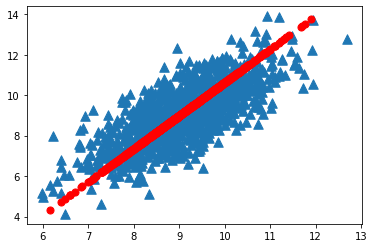

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(rec[:, 0].flatten().A[0], rec[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

In [14]:
low,rec=pca(dataMat,2)

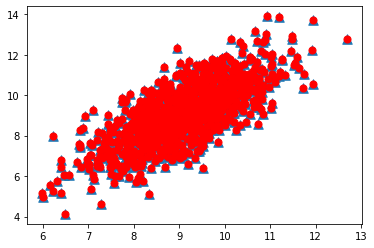

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(rec[:, 0].flatten().A[0], rec[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

In [20]:
def replaceNanWithMean():
    datMat = loadDataSet('data/secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        # 对value不为NaN的求均值
        # .A 返回矩阵基于的数组
        meanVal = mean(datMat[nonzero(~isnan(datMat[:, i].A))[0], i])
        # 将value为NaN的值赋值为均值
        datMat[nonzero(isnan(datMat[:, i].A))[0],i] = meanVal
    return datMat

In [23]:
dataMat=replaceNanWithMean()

In [31]:
dataMat[0]

matrix([[ 3.03093000e+03,  2.56400000e+03,  2.18773330e+03,
          1.41112650e+03,  1.36020000e+00,  1.00000000e+02,
          9.76133000e+01,  1.24200000e-01,  1.50050000e+00,
          1.62000000e-02, -3.40000000e-03,  9.45500000e-01,
          2.02439600e+02,  0.00000000e+00,  7.95580000e+00,
          4.14871000e+02,  1.00433000e+01,  9.68000000e-01,
          1.92396300e+02,  1.25190000e+01,  1.40260000e+00,
         -5.41900000e+03,  2.91650000e+03, -4.04375000e+03,
          7.51000000e+02,  8.95500000e-01,  1.77300000e+00,
          3.04900000e+00,  6.42333000e+01,  2.02220000e+00,
          1.63200000e-01,  3.51910000e+00,  8.33971000e+01,
          9.51260000e+00,  5.06170000e+01,  6.42588000e+01,
          4.93830000e+01,  6.63141000e+01,  8.69555000e+01,
          1.17513200e+02,  6.12900000e+01,  4.51500000e+00,
          7.00000000e+01,  3.52717300e+02,  1.01841000e+01,
          1.30369100e+02,  7.23309200e+02,  1.30720000e+00,
          1.41228200e+02,  1.00000000e+0

In [27]:
meanVals = mean(dataMat, axis=0)

In [28]:
meanVals

matrix([[ 3.01445290e+03,  2.49585023e+03,  2.20054732e+03,
          1.39637663e+03,  4.19701314e+00,  1.00000000e+02,
          1.01112908e+02,  1.21821502e-01,  1.46286166e+00,
         -8.41022364e-04,  1.45750799e-04,  9.64352780e-01,
          1.99956809e+02,  0.00000000e+00,  9.00537052e+00,
          4.13086035e+02,  9.90760281e+00,  9.71443926e-01,
          1.90047354e+02,  1.24810340e+01,  1.40505424e+00,
         -5.61839361e+03,  2.69937843e+03, -3.80629973e+03,
         -2.98598136e+02,  1.20384473e+00,  1.93847681e+00,
          6.63862799e+00,  6.94995323e+01,  2.36619744e+00,
          1.84158914e-01,  3.67318939e+00,  8.53374687e+01,
          8.96027854e+00,  5.05826386e+01,  6.45557870e+01,
          4.94173705e+01,  6.62212736e+01,  8.68365766e+01,
          1.18679554e+02,  6.79049093e+01,  3.35306617e+00,
          7.00000000e+01,  3.55538904e+02,  1.00311650e+01,
          1.36743060e+02,  7.33672811e+02,  1.17795811e+00,
          1.39972231e+02,  1.00000000e+0

In [29]:
meanRemoved = dataMat-meanVals

In [32]:
meanRemoved[0]

matrix([[ 1.64771044e+01,  6.81497692e+01, -1.28140177e+01,
          1.47498726e+01, -2.83681314e+00,  0.00000000e+00,
         -3.49960824e+00,  2.37849807e-03,  3.76383387e-02,
          1.70410224e-02, -3.54575080e-03, -1.88527796e-02,
          2.48279073e+00,  0.00000000e+00, -1.04957052e+00,
          1.78496458e+00,  1.35697187e-01, -3.44392583e-03,
          2.34894642e+00,  3.79660244e-02, -2.45424378e-03,
          1.99393610e+02,  2.17121565e+02, -2.37450266e+02,
          1.04959814e+03, -3.08344728e-01, -1.65476805e-01,
         -3.58962799e+00, -5.26623233e+00, -3.43997444e-01,
         -2.09589137e-02, -1.54089393e-01, -1.94036871e+00,
          5.52321456e-01,  3.43614304e-02, -2.96987037e-01,
         -3.43704981e-02,  9.28264368e-02,  1.18923436e-01,
         -1.16635441e+00, -6.61490927e+00,  1.16193383e+00,
          0.00000000e+00, -2.82160358e+00,  1.52934994e-01,
         -6.37395977e+00, -1.03636115e+01,  1.29241890e-01,
          1.25596909e+00,  0.00000000e+0

In [33]:
covMat = cov(meanRemoved, rowvar=0)

In [34]:
  eigvals, eigVects = linalg.eig(mat(covMat))

In [35]:
eigvals

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  